# **Decision Tree**
**GUNGUN JAIN | T085**


# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("Libraries imported ")


Libraries imported 


In [2]:
df = pd.read_csv('/content/adult.csv')
print("dataframe of ADULT dataset created")


dataframe of ADULT dataset created


In [3]:
df.head()


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
# Adult dataset: 14 features and 1 label column ('income')
df.shape


(32561, 15)

In [5]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


# Checking for NULL values


In [6]:
df.isnull().sum()


,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0


In [7]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


# Encoding label column (R/M) to numeric


In [8]:
from sklearn.preprocessing import LabelEncoder


In [9]:
le = LabelEncoder()


In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Encode all object (string) columns
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])


In [12]:
df.head()


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


In [26]:
# X- Features  y- Label
X = df.iloc[:, 0:14]       # all 14 feature columns of adult dataset
y = df['income']           # encoded label column


# Doing train_test_split

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101
)


# Training the model


In [28]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0, criterion='gini')
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

# Checking accuracy of testing dataset

In [29]:
from sklearn.metrics import accuracy_score
import math

predictions_test = clf.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, predictions_test) * 100)


Accuracy :  80.77592384072064


# Checking accuracy of training dataset

In [30]:
predictions_train = clf.predict(X_train)
accuracy_score(y_train, predictions_train)


1.0

# Visualizing our final decision tree

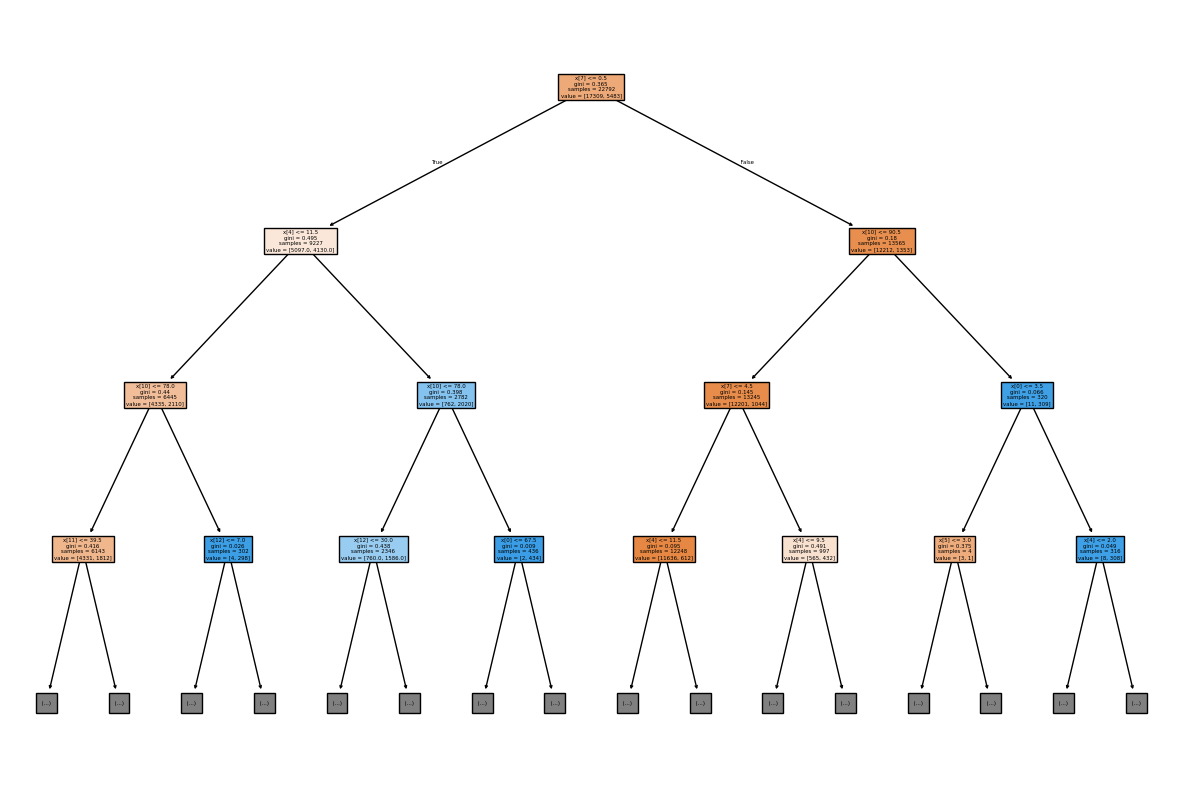

In [45]:
from sklearn import tree
plt.figure(figsize=(15,10))

tree.plot_tree(
    clf,
    filled=True,
    max_depth=3   # <<< LIMIT DEPTH HERE
)

plt.show()


# Evaluating our test dataset

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions_test))
print(confusion_matrix(y_test, predictions_test))


              precision    recall  f1-score   support

           0       0.88      0.87      0.87      7411
           1       0.60      0.61      0.61      2358

    accuracy                           0.81      9769
   macro avg       0.74      0.74      0.74      9769
weighted avg       0.81      0.81      0.81      9769

[[6450  961]
 [ 917 1441]]


# Evaluating our training dataset

In [34]:
print(classification_report(y_train,predictions_train))
print(confusion_matrix(y_train,predictions_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17309
           1       1.00      1.00      1.00      5483

    accuracy                           1.00     22792
   macro avg       1.00      1.00      1.00     22792
weighted avg       1.00      1.00      1.00     22792

[[17309     0]
 [    0  5483]]


# Finding false positive rate and true positive rate

In [35]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
dt_probs = clf.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt_probs)
print("FPR :", fpr_dt)
print("TPR :", tpr_dt)
print("Threshold :", thresholds_dt)



FPR : [0.         0.12967211 1.        ]
TPR : [0.         0.61111111 1.        ]
Threshold : [inf  1.  0.]


# Plotting *ROC* curve for our Decision Tree

In [36]:
auc_score_dt = auc(fpr_dt,tpr_dt)
auc_score_dt

np.float64(0.7407195010419947)

In [39]:
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(10,8))
    plt.plot(fpr_dt, tpr_dt, color='red', label='AUC = %0.2f' % auc_score_dt)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

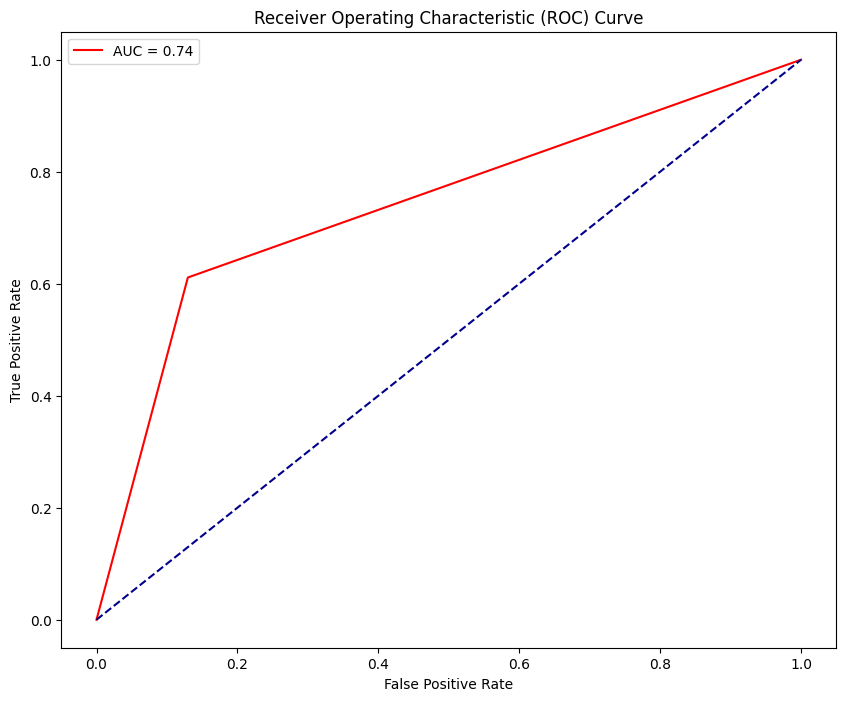

In [40]:
plot_roc_curve(fpr_dt,tpr_dt)

# Pruning of our decision tree

In [42]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Visualizing alpha w.r.t impurity of leaves

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

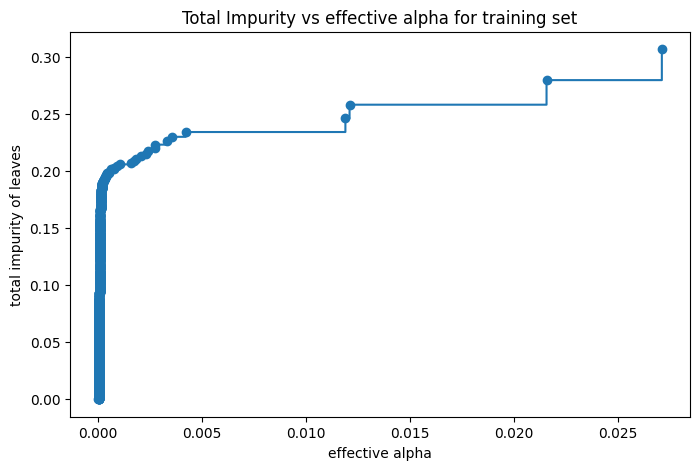

In [46]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [47]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

print("Number of nodes in the last tree is:", clfs[-1].tree_.node_count,
      "with ccp_alpha:", ccp_alphas[-1])


Number of nodes in the last tree is: 1 with ccp_alpha: 0.05831067494201053


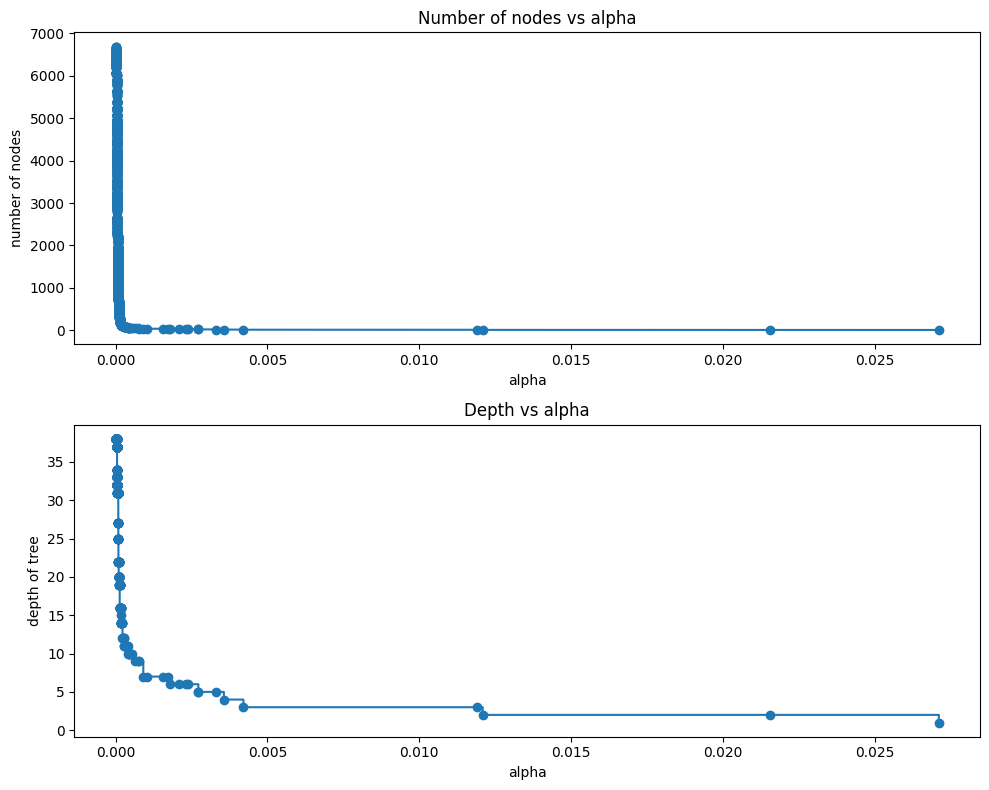

In [48]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,8))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

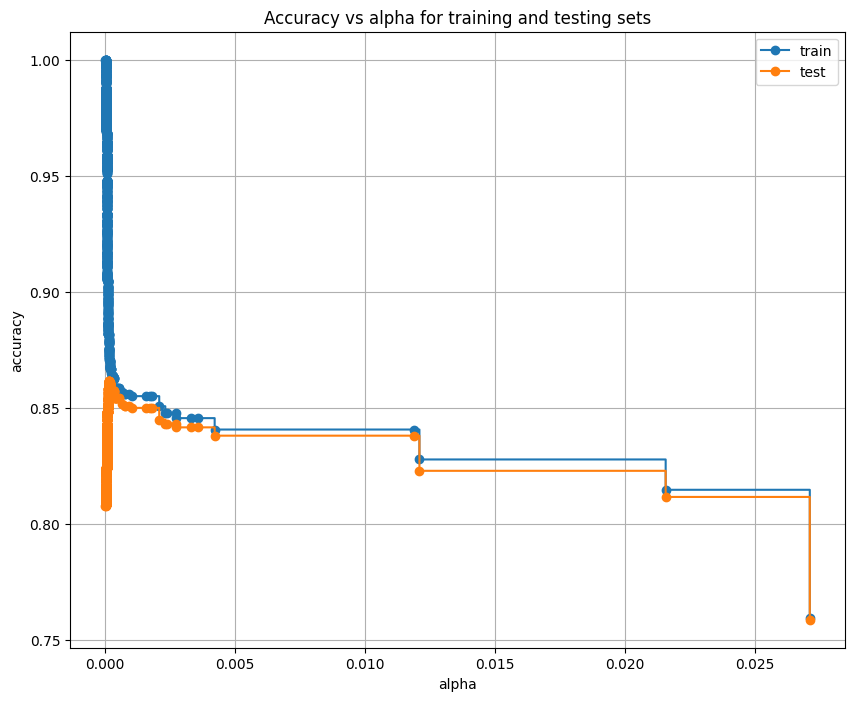

In [49]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(10,8))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.grid()
plt.show()

# Accuracy after pruning

In [50]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.016)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.016, random_state=0)

### Accuracy of test dataset

In [51]:
from sklearn.metrics import accuracy_score
pred=clf.predict(X_test)
accuracy_score(y_test, pred)

0.8228068379568021

### Accuracy of training dataset

In [54]:
pred_1 = clf.predict(X_train)
accuracy_score(y_train,pred_1)

0.8277027027027027

# Visualizing after pruning

[Text(0.5, 0.8333333333333334, 'x[7] <= 0.5\ngini = 0.365\nsamples = 22792\nvalue = [17309, 5483]'),
 Text(0.25, 0.5, 'x[4] <= 11.5\ngini = 0.495\nsamples = 9227\nvalue = [5097.0, 4130.0]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.44\nsamples = 6445\nvalue = [4335, 2110]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.398\nsamples = 2782\nvalue = [762, 2020]'),
 Text(0.75, 0.5, 'x[10] <= 90.5\ngini = 0.18\nsamples = 13565\nvalue = [12212, 1353]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.145\nsamples = 13245\nvalue = [12201, 1044]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.066\nsamples = 320\nvalue = [11, 309]')]

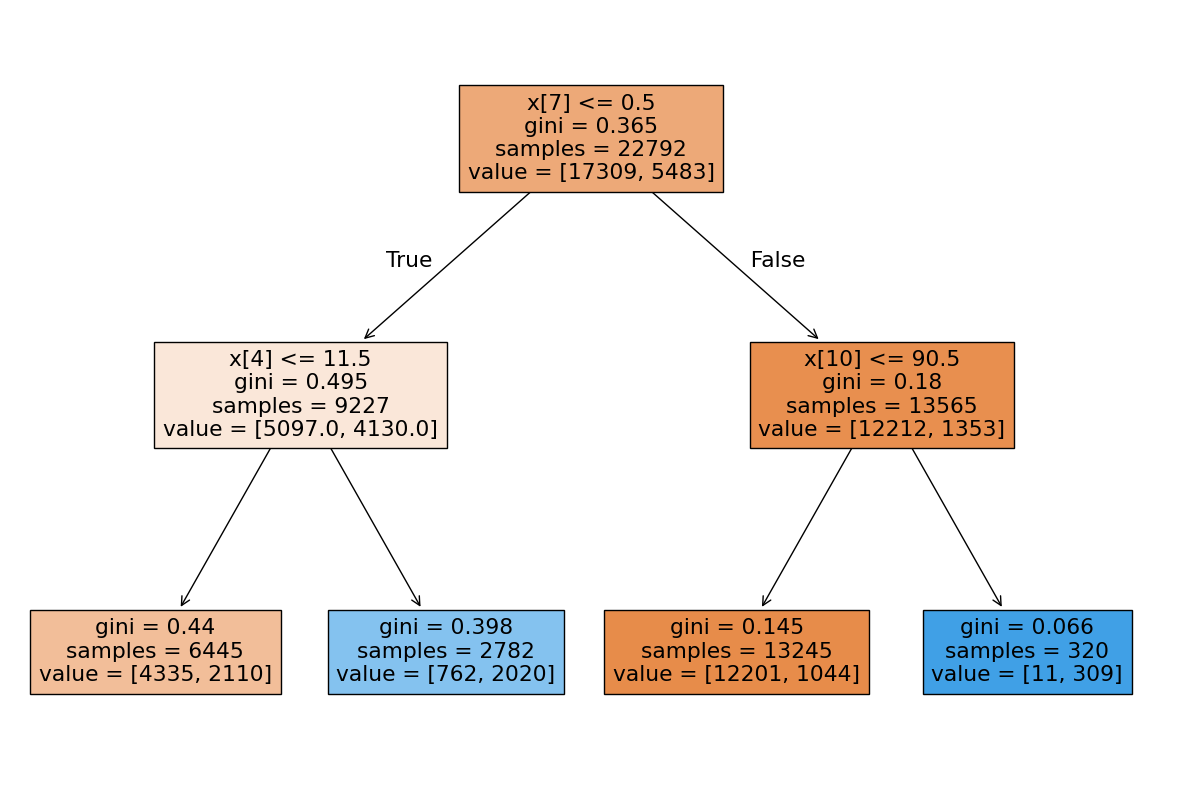

In [55]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)